In [1]:
from pyspark.sql import SparkSession
import pandas as pd
spark = SparkSession.builder.master("local[*]").getOrCreate()

In [2]:
df = spark.read.format("csv").option("header", "true").load("soccer_player.csv")

In [3]:
df2 = spark.read.format("csv").option("header", "true").load("lig_takim.csv")

In [4]:
#drop if League is MLS
df = df.drop(df.League=="MLS")

In [5]:
#Drop 2 attributes in df -> League and _c0
df = df.drop(("League"))
df = df.drop(("_c0"))

In [6]:
#join two dataframes
data_frame = df.join(df2, df['squad'] == df2['squad'])
data_frame

DataFrame[Team: string, player: string, Substitution : string, xG Per Avg Match: string, Shots: string, OnTarget: string, Shots Per Avg Match: string, On Target Per Avg Match: string, value: string, nationality: string, position: string, squad: string, goals: string, goals_per_shot: string, passes_completed: string, assisted_shots: string, passes_blocked: string, touches: string, height: string, assists: string, games_starts: string, minutes: string, squad: string, League: string]

In [7]:
#after join, drop duplicate columns
data_frame = df.join(df2,['squad'])
data_frame

DataFrame[squad: string, Team: string, player: string, Substitution : string, xG Per Avg Match: string, Shots: string, OnTarget: string, Shots Per Avg Match: string, On Target Per Avg Match: string, value: string, nationality: string, position: string, goals: string, goals_per_shot: string, passes_completed: string, assisted_shots: string, passes_blocked: string, touches: string, height: string, assists: string, games_starts: string, minutes: string, League: string]

In [8]:
display(data_frame)

DataFrame[squad: string, Team: string, player: string, Substitution : string, xG Per Avg Match: string, Shots: string, OnTarget: string, Shots Per Avg Match: string, On Target Per Avg Match: string, value: string, nationality: string, position: string, goals: string, goals_per_shot: string, passes_completed: string, assisted_shots: string, passes_blocked: string, touches: string, height: string, assists: string, games_starts: string, minutes: string, League: string]

In [9]:
print(data_frame.collect()[0])

Row(squad='Real Madrid', Team='1', player='Karim Benzema', Substitution ='0', xG Per Avg Match='0.63', Shots='27', OnTarget='12', Shots Per Avg Match='3.46', On Target Per Avg Match='1.54', value='32000000', nationality='fr FRA', position='FW', goals='21', goals_per_shot='0.14', passes_completed='1119', assisted_shots='61', passes_blocked='36', touches='1688', height='184', assists='8', games_starts='36', minutes='3141', League='La Liga')


In [10]:
data_frame.printSchema()

root
 |-- squad: string (nullable = true)
 |-- Team: string (nullable = true)
 |-- player: string (nullable = true)
 |-- Substitution : string (nullable = true)
 |-- xG Per Avg Match: string (nullable = true)
 |-- Shots: string (nullable = true)
 |-- OnTarget: string (nullable = true)
 |-- Shots Per Avg Match: string (nullable = true)
 |-- On Target Per Avg Match: string (nullable = true)
 |-- value: string (nullable = true)
 |-- nationality: string (nullable = true)
 |-- position: string (nullable = true)
 |-- goals: string (nullable = true)
 |-- goals_per_shot: string (nullable = true)
 |-- passes_completed: string (nullable = true)
 |-- assisted_shots: string (nullable = true)
 |-- passes_blocked: string (nullable = true)
 |-- touches: string (nullable = true)
 |-- height: string (nullable = true)
 |-- assists: string (nullable = true)
 |-- games_starts: string (nullable = true)
 |-- minutes: string (nullable = true)
 |-- League: string (nullable = true)



In [11]:
from pyspark.sql.types import IntegerType
from pyspark.sql.types import DoubleType
from pyspark.sql.functions import col
#turn to numerical type
data_frame = data_frame.withColumn('goals',col('goals').cast(IntegerType()))

In [12]:
data_frame = data_frame.withColumn('Substitution',col('goals').cast(IntegerType()))
data_frame = data_frame.withColumn('xG Per Avg Match',col('xG Per Avg Match').cast(DoubleType()))
data_frame = data_frame.withColumn('Shots',col('Shots').cast(IntegerType()))
data_frame = data_frame.withColumn('OnTarget',col('OnTarget').cast(IntegerType()))
data_frame = data_frame.withColumn('Shots Per Avg Match',col('Shots Per Avg Match').cast(DoubleType()))
data_frame = data_frame.withColumn('On Target Per Avg Match',col('On Target Per Avg Match').cast(DoubleType()))
data_frame = data_frame.withColumn('value',col('value').cast(IntegerType()))
data_frame = data_frame.withColumn('goals_per_shot',col('goals_per_shot').cast(DoubleType()))
data_frame = data_frame.withColumn('passes_completed',col('passes_completed').cast(IntegerType()))
data_frame = data_frame.withColumn('assisted_shots',col('assisted_shots').cast(IntegerType()))
data_frame = data_frame.withColumn('passes_blocked',col('passes_blocked').cast(IntegerType()))
data_frame = data_frame.withColumn('touches',col('touches').cast(IntegerType()))
data_frame = data_frame.withColumn('height',col('height').cast(IntegerType()))
data_frame = data_frame.withColumn('games_starts',col('games_starts').cast(IntegerType()))
data_frame = data_frame.withColumn('minutes',col('minutes').cast(IntegerType()))
data_frame = data_frame.withColumn('assists',col('assists').cast(IntegerType()))

In [13]:
data_frame.printSchema()

root
 |-- squad: string (nullable = true)
 |-- Team: string (nullable = true)
 |-- player: string (nullable = true)
 |-- Substitution : string (nullable = true)
 |-- xG Per Avg Match: double (nullable = true)
 |-- Shots: integer (nullable = true)
 |-- OnTarget: integer (nullable = true)
 |-- Shots Per Avg Match: double (nullable = true)
 |-- On Target Per Avg Match: double (nullable = true)
 |-- value: integer (nullable = true)
 |-- nationality: string (nullable = true)
 |-- position: string (nullable = true)
 |-- goals: integer (nullable = true)
 |-- goals_per_shot: double (nullable = true)
 |-- passes_completed: integer (nullable = true)
 |-- assisted_shots: integer (nullable = true)
 |-- passes_blocked: integer (nullable = true)
 |-- touches: integer (nullable = true)
 |-- height: integer (nullable = true)
 |-- assists: integer (nullable = true)
 |-- games_starts: integer (nullable = true)
 |-- minutes: integer (nullable = true)
 |-- League: string (nullable = true)
 |-- Substitutio

In [14]:
from handyspark import *
import matplotlib.pyplot as plt

In [15]:
hdf = data_frame.toHandy()

C:\Users\TUBA\anaconda3.2\lib\site-packages\pyspark\sql\dataframe.py:148: UserWarning: DataFrame.sql_ctx is an internal property, and will be removed in future releases. Use DataFrame.sparkSession instead.
  warnings.warn(
C:\Users\TUBA\anaconda3.2\lib\site-packages\pyspark\sql\dataframe.py:127: UserWarning: DataFrame constructor is internal. Do not directly use it.
  warnings.warn("DataFrame constructor is internal. Do not directly use it.")


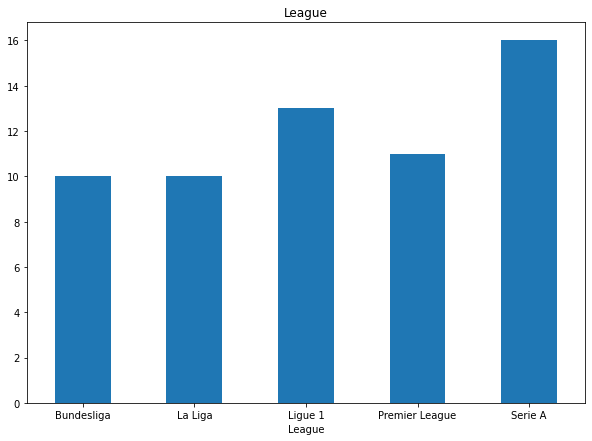

In [16]:
#distribuiton of class League
fig, ax = plt.subplots(figsize=(10, 7))
hdf.cols['League'].hist(ax=ax)
plt.show()

[]

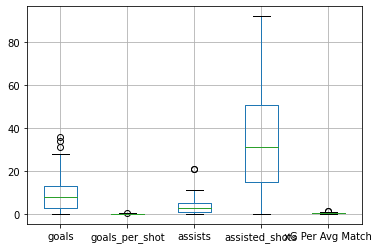

In [17]:
import pandas as pd
b_plot = data_frame.toPandas().boxplot(column = ['goals', 'goals_per_shot', 'assists','assisted_shots','xG Per Avg Match'])
b_plot.plot()

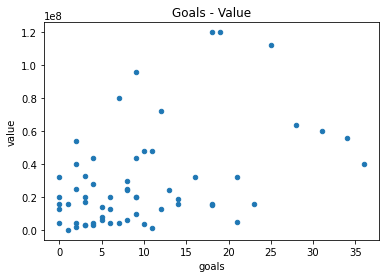

In [18]:
data_frame.toPandas().plot.scatter(x='goals', y='value', title= "Goals - Value");

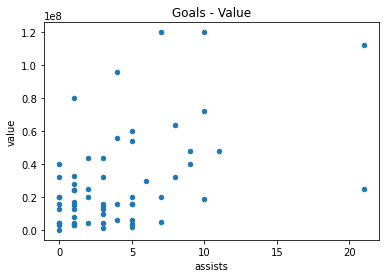

In [19]:
data_frame.toPandas().plot.scatter(x='assists', y='value', title= "Goals - Value");

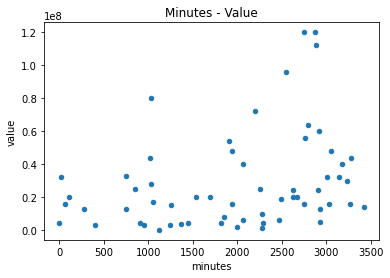

In [39]:
data_frame.toPandas().plot.scatter(x='minutes', y='value', title= "Minutes - Value");

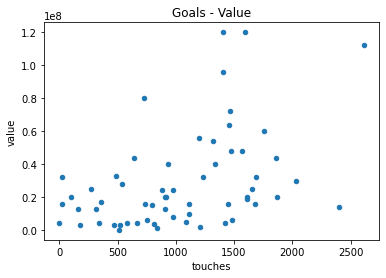

In [21]:
data_frame.toPandas().plot.scatter(x='touches', y='value', title= "Goals - Value");

()

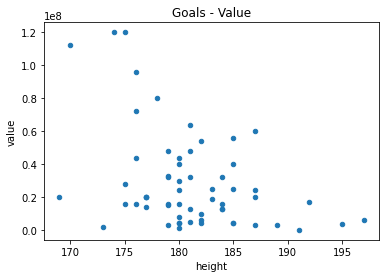

In [22]:
data_frame.toPandas().plot.scatter(x='height', y='value', title= "Goals - Value");()

()

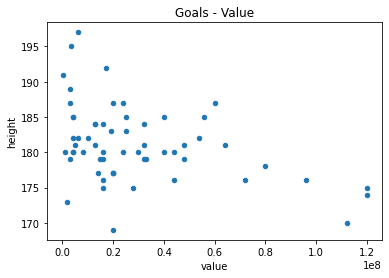

In [23]:
data_frame.toPandas().plot.scatter( x='value',y='height', title= "Goals - Value");()

()

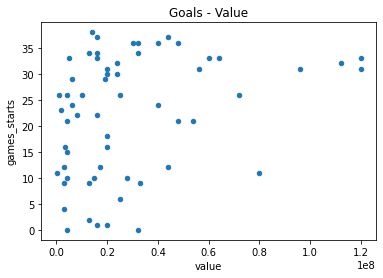

In [24]:
data_frame.toPandas().plot.scatter( x='value',y='games_starts', title= "Goals - Value");()

()

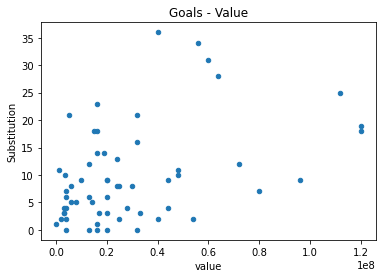

In [25]:
data_frame.toPandas().plot.scatter( x='value',y='Substitution', title= "Goals - Value");()

### Data Manipulation

##### Correlation Matrix

In [31]:
from pyspark.mllib.stat import Statistics
import pandas as pd

# result can be used w/ seaborn's heatmap
def compute_correlation_matrix(df, method='pearson'):
    # wrapper around
    # https://forums.databricks.com/questions/3092/how-to-calculate-correlation-matrix-with-all-colum.html
    df_rdd = df.rdd.map(lambda row: row[0:])
    corr_mat = Statistics.corr(df_rdd, method=method)
    corr_mat_df = pd.DataFrame(corr_mat,
                    columns=df.columns, 
                    index=df.columns)
    return corr_mat_df

In [33]:
data_frame.stat.corr('goals','value')

0.4363000874993775

In [38]:
import pandas as pd
data = pd.DataFrame(data_frame)
data.corr()

ValueError: DataFrame constructor not properly called!